Mencoba menghubungkan ke Google Drive...
Mounted at /content/drive

Mencari file di lokasi: /content/drive/MyDrive/Colab Notebooks/diabetes.csv

[SUKSES] Dataset dimuat dari Google Drive!

--- 5 Baris Pertama Data ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Informasi Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 en

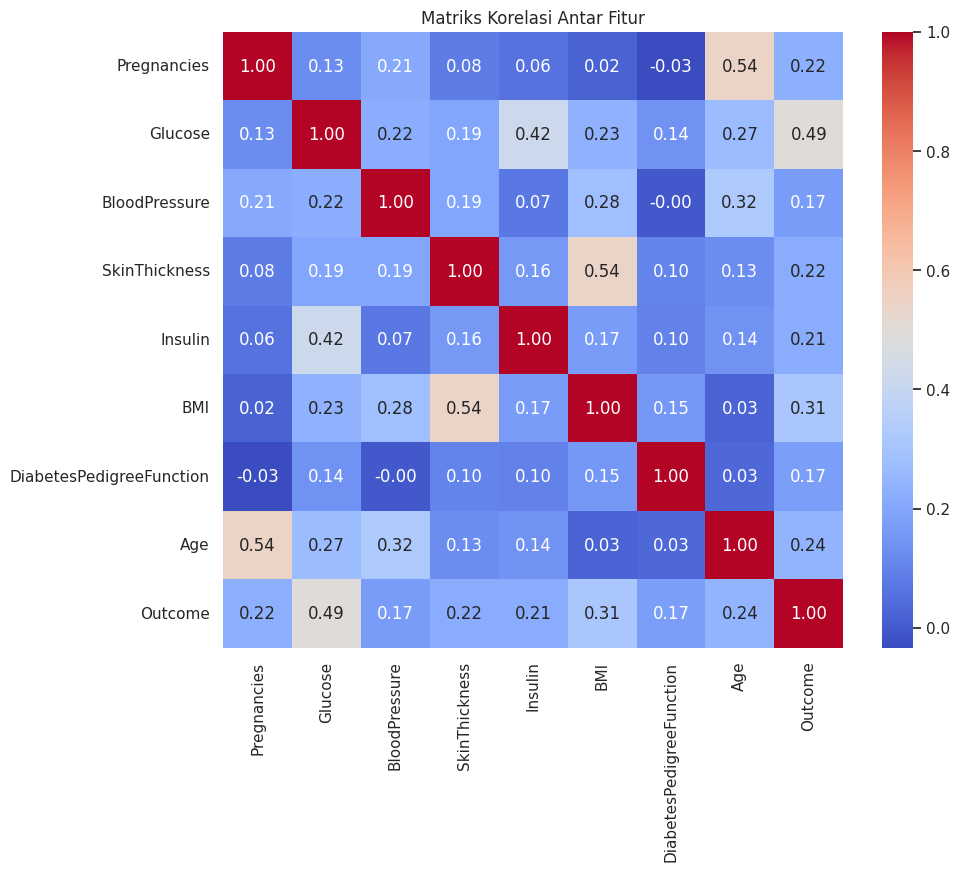

/tmp/ipython-input-1792080525.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df_clean, palette='pastel')


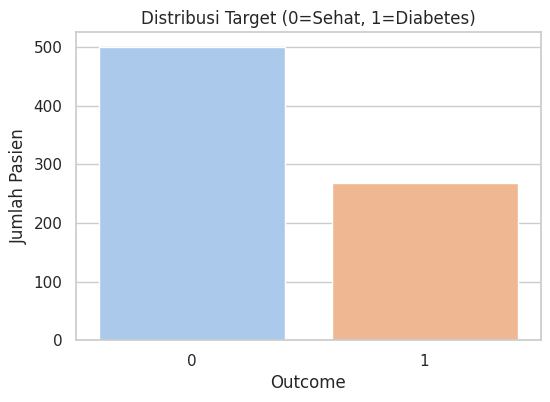

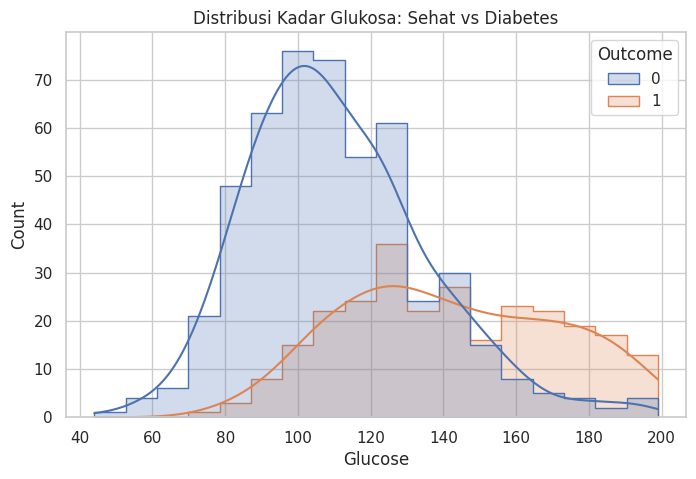


Jumlah Data Training: 614
Jumlah Data Testing: 154

Model telah selesai dilatih.

--- Akurasi Model: 75.32% ---

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:


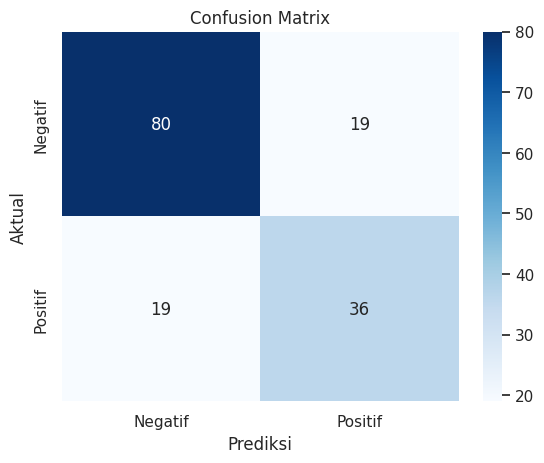


Fitur Paling Berpengaruh (Importance):
Glucose                     0.257437
BMI                         0.166827
Age                         0.131211
DiabetesPedigreeFunction    0.118966
Insulin                     0.093984
BloodPressure               0.084190
SkinThickness               0.073973
Pregnancies                 0.073412
dtype: float64


In [1]:
"""Diabetes_Analysis.ipynb

# Laporan Analisis Data: Prediksi Diabetes Pima Indians
# Final Project - Data Science

## 1. Import Library (Tools)
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive
from google.colab import files


sns.set(style="whitegrid")

"""## 2. Data Wrangling

### A. Collecting Data
Mencoba Google Drive -> Jika gagal, minta Upload Manual -> Jika batal, pakai Internet.
"""

cols_name = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

data_loaded = False
try:
    print("Mencoba menghubungkan ke Google Drive...")
    drive.mount('/content/drive')
    nama_folder_anda = 'Colab Notebooks'

    base_path = '/content/drive/MyDrive'
    if nama_folder_anda:
        full_path = os.path.join(base_path, nama_folder_anda, 'diabetes.csv')
    else:
        full_path = os.path.join(base_path, 'diabetes.csv')

    print(f"\nMencari file di lokasi: {full_path}")
    df = pd.read_csv(full_path)
    print(f"\n[SUKSES] Dataset dimuat dari Google Drive!")
    data_loaded = True

except Exception as e:
    print(f"\n[INFO] Gagal mengakses Google Drive ({str(e)}).")

"""### B. Discovery (Memahami Data)
"""

if 'df' in locals():
    print("\n--- 5 Baris Pertama Data ---")
    print(df.head())

    print("\n--- Informasi Tipe Data ---")
    print(df.info())

    print("\n--- Statistik Deskriptif (Perhatikan nilai min=0) ---")
    print(df.describe())

    cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    print("\n--- Jumlah Nilai 0 (Tidak Valid) per Kolom ---")
    for col in cols_with_zeros:
        count = (df[col] == 0).sum()
        print(f"{col}: {count} data")

"""### C. Cleaning (Pembersihan Data)
Mengganti nilai 0 dengan NaN, lalu mengisinya dengan nilai rata-rata (Imputasi).
"""

if 'df' in locals():
    df_clean = df.copy()

    df_clean[cols_with_zeros] = df_clean[cols_with_zeros].replace(0, np.nan)
    for col in cols_with_zeros:
        mean_val = df_clean[col].mean()
        df_clean[col] = df_clean[col].fillna(mean_val)
        print(f"Mengisi missing values di kolom {col} dengan rata-rata: {mean_val:.2f}")

    print("\n--- Cek Kembali Nilai 0 (Seharusnya sudah 0 semua) ---")
    print(df_clean[cols_with_zeros].isnull().sum())

"""### D. Transformation
Melakukan Scaling (Normalisasi) agar rentang data seragam.
"""

if 'df' in locals():
    scaler = StandardScaler()
    features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

    df_scaled = df_clean.copy()
    df_scaled[features] = scaler.fit_transform(df_scaled[features])

    print("\n--- Contoh Perbandingan Data (Sebelum vs Sesudah Scaling) ---")
    print("SEBELUM (Asli):")
    print(df_clean[['Glucose', 'Insulin']].head(3))
    print("\nSESUDAH (Scaled):")
    print(df_scaled[['Glucose', 'Insulin']].head(3))

if 'df' in locals():
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_clean.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriks Korelasi Antar Fitur")
    plt.show()

"""## 3. Exploratory Data Analysis (EDA)
Melihat distribusi data target (Outcome) dan hubungan antar fitur.
"""

if 'df' in locals():
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Outcome', data=df_clean, palette='pastel')
    plt.title("Distribusi Target (0=Sehat, 1=Diabetes)")
    plt.xlabel("Outcome")
    plt.ylabel("Jumlah Pasien")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_clean, x='Glucose', hue='Outcome', kde=True, element="step")
    plt.title("Distribusi Kadar Glukosa: Sehat vs Diabetes")
    plt.show()

"""## 4. Splitting Data
Membagi data menjadi data Latih (Train) dan data Uji (Test).
"""

if 'df' in locals():
    X = df_clean.drop('Outcome', axis=1)
    y = df_clean['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nJumlah Data Training: {X_train.shape[0]}")
    print(f"Jumlah Data Testing: {X_test.shape[0]}")

"""## 5. Modeling
Menggunakan algoritma Random Forest Classifier.
"""

if 'df' in locals():
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    model_rf.fit(X_train, y_train)
    print("\nModel telah selesai dilatih.")

"""## 6. Model Evaluation
Mengukur seberapa pintar model kita.
"""

if 'df' in locals():
    y_pred = model_rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n--- Akurasi Model: {acc*100:.2f}% ---\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.title('Confusion Matrix')
    plt.show()

    feature_imp = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nFitur Paling Berpengaruh (Importance):")
    print(feature_imp)